## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

## Importing dataset

In [2]:
# Data procured from 'Autism Screening on Adults' dataset by Larxel on Kaggle
dataF = pd.read_csv('autism_screening.csv')
dataF

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [3]:
# Checking info about dataset
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

## Data Preprocessing

In [4]:
# Checking for null values in dataset
dataF.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [5]:
# Dropping rows containing null age values
dataF = dataF.dropna(subset=['age'])
dataF.isnull().any()

A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                False
gender             False
ethnicity          False
jundice            False
austim             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation           False
Class/ASD          False
dtype: bool

In [6]:
# Dropping data columns redundant for our use:
# Dropping ethnicity, country_of_res, used_app_before, age_desc, relation, Class/ASD
# These are attributes needed by the app developed by Fadi Thabtah
dataF = dataF.drop(columns=[ 'ethnicity', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD' ])
dataF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 703
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   702 non-null    int64  
 1   A2_Score   702 non-null    int64  
 2   A3_Score   702 non-null    int64  
 3   A4_Score   702 non-null    int64  
 4   A5_Score   702 non-null    int64  
 5   A6_Score   702 non-null    int64  
 6   A7_Score   702 non-null    int64  
 7   A8_Score   702 non-null    int64  
 8   A9_Score   702 non-null    int64  
 9   A10_Score  702 non-null    int64  
 10  age        702 non-null    float64
 11  gender     702 non-null    object 
 12  jundice    702 non-null    object 
 13  austim     702 non-null    object 
 14  result     702 non-null    float64
dtypes: float64(2), int64(10), object(3)
memory usage: 87.8+ KB


<Axes: >

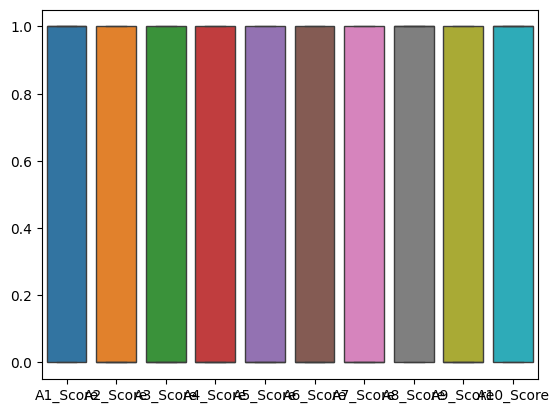

In [7]:
# Outlier detection
sbn.boxplot(dataF.drop(['age', 'result'], axis=1))

<Axes: >

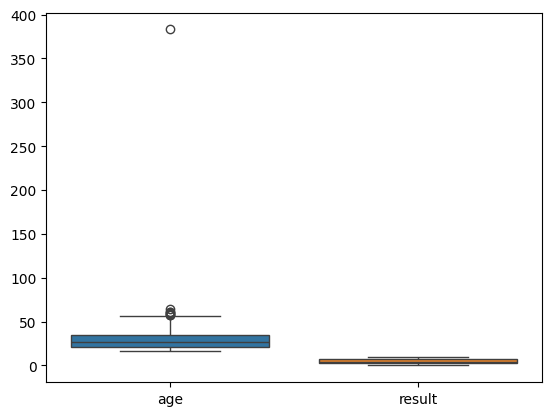

In [8]:
sbn.boxplot(dataF[[ 'age', 'result' ]])

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 703
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   692 non-null    int64  
 1   A2_Score   692 non-null    int64  
 2   A3_Score   692 non-null    int64  
 3   A4_Score   692 non-null    int64  
 4   A5_Score   692 non-null    int64  
 5   A6_Score   692 non-null    int64  
 6   A7_Score   692 non-null    int64  
 7   A8_Score   692 non-null    int64  
 8   A9_Score   692 non-null    int64  
 9   A10_Score  692 non-null    int64  
 10  age        692 non-null    float64
 11  gender     692 non-null    object 
 12  jundice    692 non-null    object 
 13  austim     692 non-null    object 
 14  result     692 non-null    float64
dtypes: float64(2), int64(10), object(3)
memory usage: 86.5+ KB


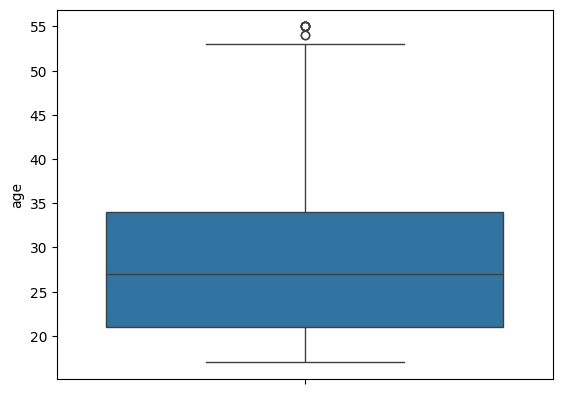

In [9]:
# Removing outliers in age by limiting maximum age to upper limit (quartile3 + 1.5 * (quartile3 - quartile1))
IQR = dataF['age'].quantile(0.75) - dataF['age'].quantile(0.25)
Age_ULim = dataF['age'].quantile(0.75) + (1.5 * IQR)
dataF = dataF[dataF['age'] < Age_ULim]
sbn.boxplot(dataF['age'])
dataF.info()

In [10]:
dataF.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6.0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5.0
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8.0
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6.0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,2.0


In [11]:
# Encoding gender, jundice and austim data columns
LE = LabelEncoder()
dataF['gender'] = LE.fit_transform(dataF['gender'])
dataF['jundice'] = LE.fit_transform(dataF['jundice'])
dataF['austim'] = LE.fit_transform(dataF['austim'])
dataF.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,6.0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,5.0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,8.0
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,6.0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,2.0


In [12]:
# Feature scaling age and result to be between 0 and 1 to fit the rest of the binary data
MMScale = MinMaxScaler()
dataF[['age', 'result']] = MMScale.fit_transform(dataF[['age', 'result']])
dataF.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result
0,1,1,1,1,0,0,1,1,0,0,0.236842,0,0,0,0.6
1,1,1,0,1,0,0,0,1,0,1,0.184211,1,0,1,0.5
2,1,1,0,1,1,0,1,1,1,1,0.263158,1,1,1,0.8
3,1,1,0,1,0,0,1,1,0,1,0.473684,0,0,1,0.6
4,1,0,0,0,0,0,0,1,0,0,0.605263,0,0,0,0.2


In [13]:
# Splitting into independent and dependent sets
indep = dataF.drop(columns=['austim'], axis='columns')
dep = dataF['austim']

# Independent set
indep

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result
0,1,1,1,1,0,0,1,1,0,0,0.236842,0,0,0.6
1,1,1,0,1,0,0,0,1,0,1,0.184211,1,0,0.5
2,1,1,0,1,1,0,1,1,1,1,0.263158,1,1,0.8
3,1,1,0,1,0,0,1,1,0,1,0.473684,0,0,0.6
4,1,0,0,0,0,0,0,1,0,0,0.605263,0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,0.210526,0,0,0.7
700,1,0,0,0,0,0,0,1,0,1,0.447368,1,0,0.3
701,1,0,1,1,1,0,1,1,0,1,0.184211,0,0,0.7
702,1,0,0,1,1,0,1,0,1,1,0.473684,1,0,0.6


In [14]:
# Dependent set
dep

0      0
1      1
2      1
3      1
4      0
      ..
699    0
700    0
701    0
702    0
703    0
Name: austim, Length: 692, dtype: int32

In [15]:
# Splitting into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size=0.25, random_state=0)
x_train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result
492,1,0,0,0,1,0,1,1,0,1,0.421053,1,0,0.5
277,1,1,0,0,0,0,0,0,0,0,0.394737,0,0,0.2
388,1,1,0,0,1,0,0,1,0,0,0.078947,0,0,0.4
496,0,0,0,1,0,0,0,1,0,1,0.763158,1,0,0.3
531,1,1,0,0,0,0,1,1,0,0,0.394737,0,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,1,1,0,0,1,0,0,1,0.078947,1,0,0.4
197,1,0,1,1,1,1,1,1,1,1,0.552632,1,0,0.9
640,1,1,1,0,0,0,0,1,0,0,0.026316,1,0,0.4
570,1,1,0,1,0,0,0,0,0,1,0.368421,1,0,0.4


In [16]:
x_test

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result
465,1,0,0,0,0,1,0,0,0,1,0.026316,1,0,0.3
149,1,1,1,1,1,0,1,1,1,0,0.473684,1,1,0.8
612,1,1,1,1,0,0,0,0,0,1,0.263158,0,0,0.5
590,0,1,1,1,0,0,0,1,1,0,0.315789,0,0,0.5
366,1,0,1,0,1,0,0,1,0,1,0.157895,1,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0,0,1,0,0,0,0,0,0,0,1.000000,1,0,0.1
512,1,1,1,0,0,0,0,0,0,1,0.026316,0,0,0.4
532,0,1,1,1,0,0,0,0,0,1,0.473684,0,1,0.4
445,1,0,0,0,0,0,0,1,0,1,0.105263,1,0,0.3


In [17]:
y_train

492    0
277    1
388    0
496    0
531    0
      ..
367    0
197    0
640    0
570    0
696    1
Name: austim, Length: 519, dtype: int32

In [18]:
y_test

465    1
149    1
612    0
590    0
366    1
      ..
35     0
512    0
532    0
445    1
160    0
Name: austim, Length: 173, dtype: int32

## Model Building

### Decision Tree Classifier

In [19]:
# Testing with Decision Tree classifier model
DecTree = DecisionTreeClassifier(max_depth=6, random_state=1, criterion="entropy")
DecTree.fit(x_train, y_train)

# Predicting with trained model
y_pred = DecTree.predict(x_test)

# Comparing test and predicted y values
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       148
           1       0.20      0.12      0.15        25

    accuracy                           0.80       173
   macro avg       0.53      0.52      0.52       173
weighted avg       0.77      0.80      0.78       173



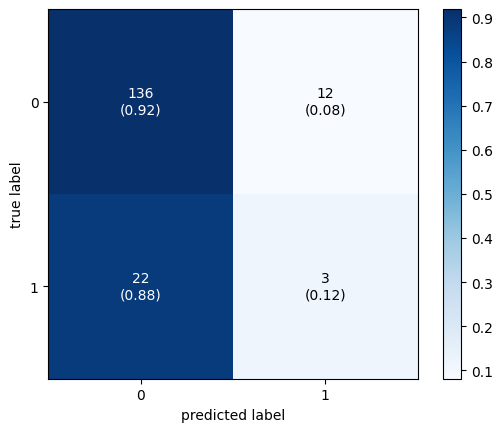

In [20]:
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

### Random Forest Classifier

In [21]:
# Training Random Forest Classifier model
RandForest = RandomForestClassifier(max_depth=8, random_state=1, criterion="entropy")
RandForest.fit(x_train, y_train)

# Predicting with model
y_pred_forest = RandForest.predict(x_test)

# Comparing actual and predicted y values
report = classification_report(y_test, y_pred_forest)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       148
           1       0.20      0.04      0.07        25

    accuracy                           0.84       173
   macro avg       0.53      0.51      0.49       173
weighted avg       0.76      0.84      0.79       173



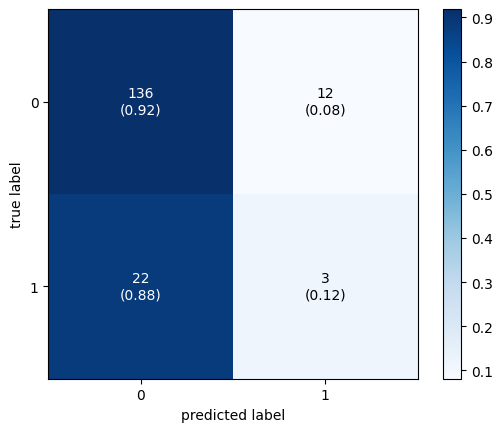

In [22]:
matrix_forest = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix_forest, show_absolute=True, show_normed=True, colorbar=True)
plt.show()